In [ ]:
%cd /content/drive/MyDrive/faster-rcnn-test

/content/drive/MyDrive/faster-rcnn-test


In [ ]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git


Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1069, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1069 (delta 166), reused 155 (delta 155), pack-reused 858
Receiving objects: 100% (1069/1069), 10.49 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (729/729), done.


In [ ]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/drive/MyDrive/faster-rcnn-test/fastercnn-pytorch-training-pipeline


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 KB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6

In [ ]:
#!curl -L "https://detect.roboflow.com/hospital_dataset/1?api_key=mdxQOCqu5GD6gx8w3Fat" > roboflow_file;

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    31  100    31    0     0     56      0 --:--:-- --:--:-- --:--:--    56


In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: ['cardiac_monitor', 'doctors', 'holter_monitor', 'iv_fluids', 'oxygen_mask', 'patients', 'stethoscope', 'syringes', 'ventilator']

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 9

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [ ]:
!pwd

/content/drive/MyDrive/faster-rcnn-test/fastercnn-pytorch-training-pipeline


In [ ]:
!wandb disabled


W&B disabled.


In [ ]:
!pip install torch==1.12.0+cu113 torchvision==0.13.0+cu113 torchaudio==0.12.0 --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 942.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0
    Uninstalling torchvision-0.13.0:
      Successfully uninstalled torchvision-0.13.0
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [ ]:
!python train.py --config data_configs/custom_data.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --project-name custom_training --batch-size 2 --no-mosaic


Not using distributed mode
device cuda
2023-02-19 07:49:49.451617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 07:49:52.310488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-02-19 07:49:52.311022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/pyt

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

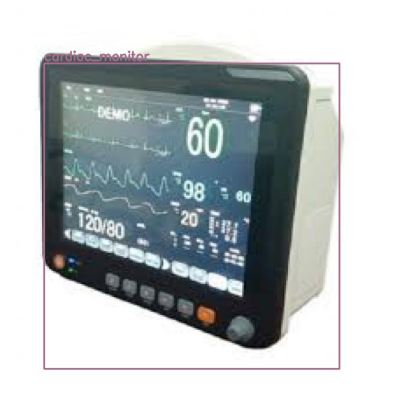

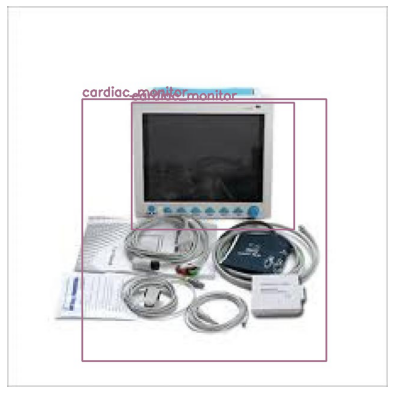

In [ ]:
results_dir_path = '/content/drive/MyDrive/faster-rcnn-test/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [ ]:
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 18/18 [00:20<00:00,  1.16s/it]


{'map': tensor(0.3372),
 'map_50': tensor(0.6509),
 'map_75': tensor(0.2983),
 'map_large': tensor(0.3372),
 'map_medium': tensor(-1.),
 'map_per_class': tensor(-1.),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.4790),
 'mar_10': tensor(0.4975),
 'mar_100': tensor(0.4975),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.4975),
 'mar_medium': tensor(-1.),
 'mar_small': tensor(-1.)}


In [ ]:
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 18/18 [00:20<00:00,  1.14s/it]


{'map': tensor(0.3372),
 'map_50': tensor(0.6509),
 'map_75': tensor(0.2983),
 'map_large': tensor(0.3372),
 'map_medium': tensor(-1.),
 'map_per_class': tensor([0.3576, 0.6685, 0.1340, 0.2156, 0.2959, 0.2789, 0.4280, 0.3270, 0.3289]),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.4790),
 'mar_10': tensor(0.4975),
 'mar_100': tensor(0.4975),
 'mar_100_per_class': tensor([0.5818, 0.7824, 0.3438, 0.3450, 0.5000, 0.5231, 0.5375, 0.4476, 0.4167]),
 'mar_large': tensor(0.4975),
 'mar_medi

In [ ]:
!python inference.py --input data/inference_data/img1.jpg --weights outputs/training/custom_training/last_model_state.pth


Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 0.517
